## Iris Dataset

In [1]:
%%time
%load_ext autoreload
%autoreload 2

Wall time: 96 ms


In [4]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 

from pandas.plotting import scatter_matrix
from tqdm import tqdm, tqdm_notebook
from scipy import stats
from sklearn import model_selection
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h4>Descriptive Analysis of dataset</h4>

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('iris.csv', names=names) # via url aumenta latencia
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
137,6.4,3.1,5.5,1.8,Iris-virginica
94,5.6,2.7,4.2,1.3,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
only_numeric_columns = df.iloc[:,:-1]
stats.describe(only_numeric_columns)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.054     , 3.75866667, 1.19866667]), variance=array([0.68569351, 0.18800403, 3.11317942, 0.58241432]), skewness=array([ 0.31175306,  0.33070281, -0.27171195, -0.10394367]), kurtosis=array([-0.57356795,  0.2414433 , -1.3953593 , -1.33524564]))

In [10]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

<h3>Data Visualizations </h3>

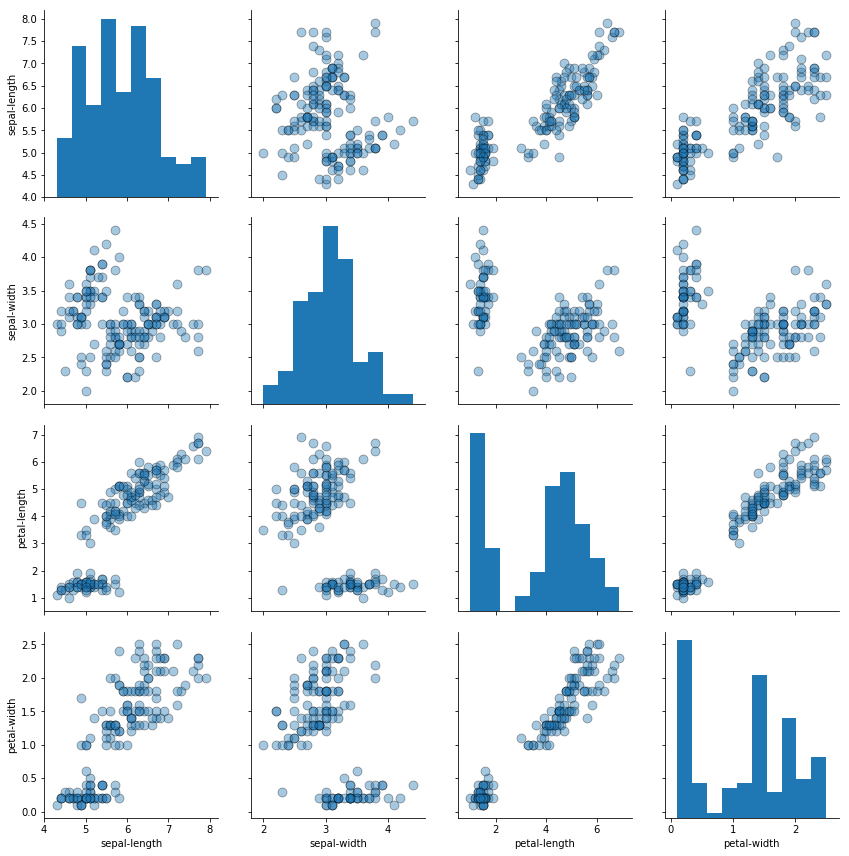

In [11]:
sns.pairplot(df,
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             height = 3)
plt.show()          


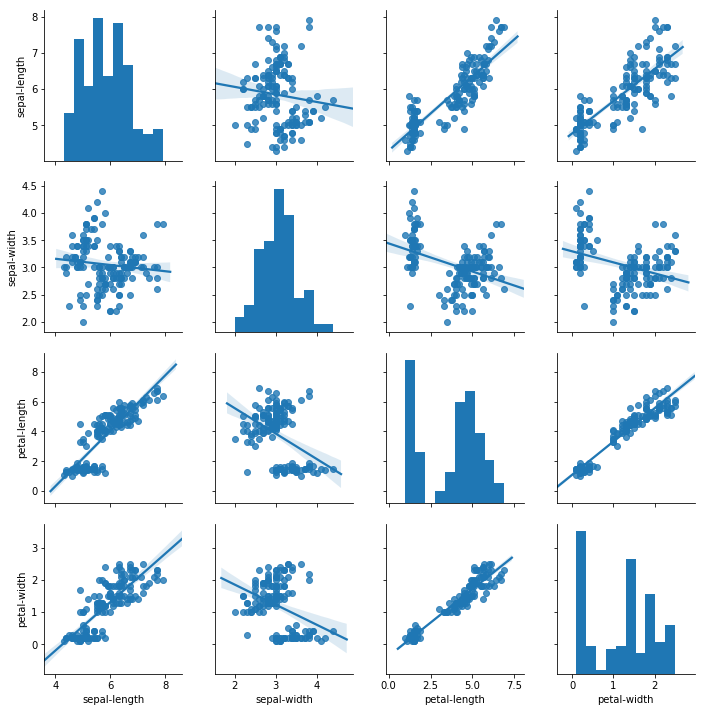

In [12]:
sns.pairplot(df, kind="reg")
plt.show()

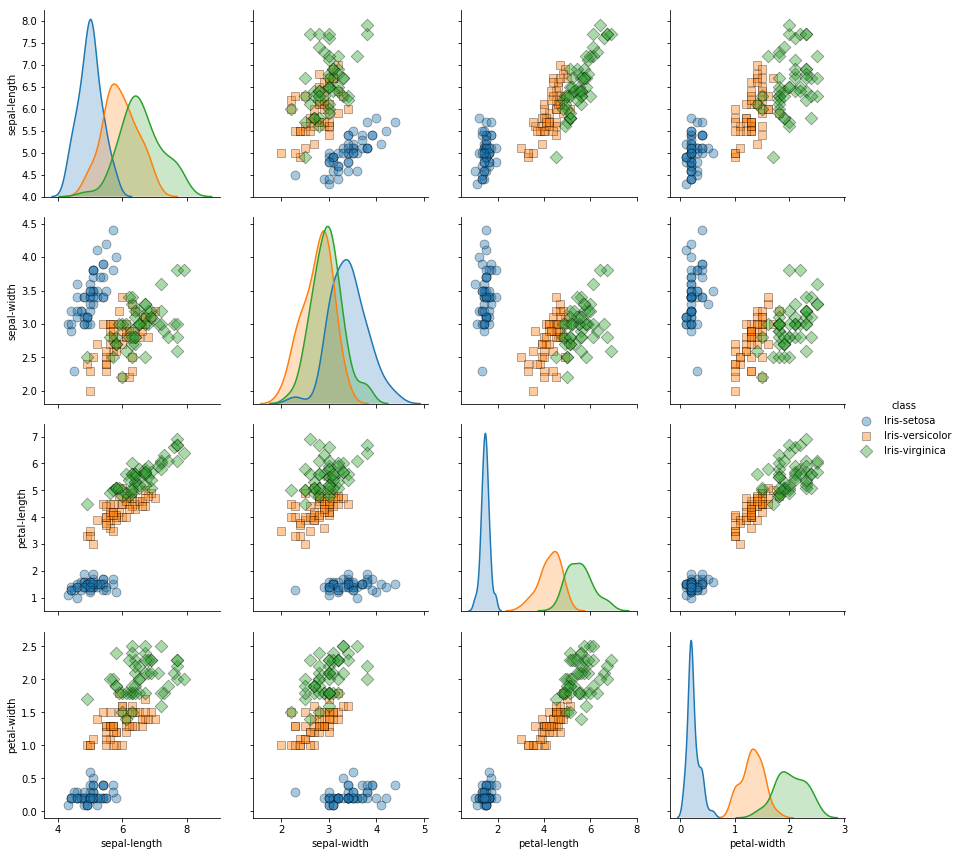

In [13]:
sns.pairplot(df , hue='class',  diag_kind = 'kde',
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             height = 3, markers=["o", "s", "D"],)
plt.show()

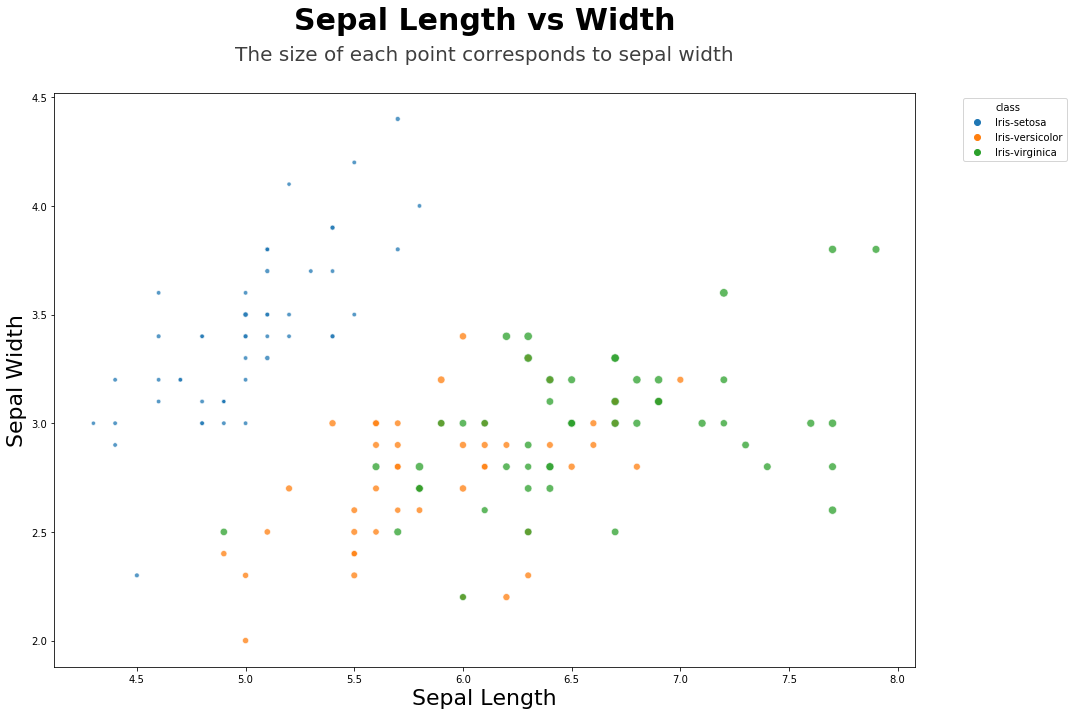

In [14]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    'sepal-length',
    'sepal-width',
    hue='class',
    size='petal-width',
    alpha=0.75,
    legend='brief',
    data=df,
    ax = ax
)

ax.set_xlabel('Sepal Length', size=22)
ax.set_ylabel('Sepal Width', size = 22)

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=30, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=20, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

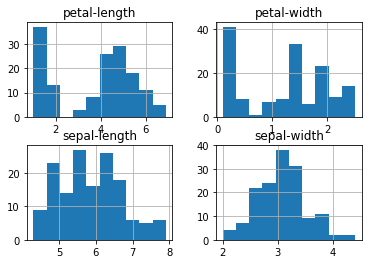

In [15]:
df.hist()
plt.show()

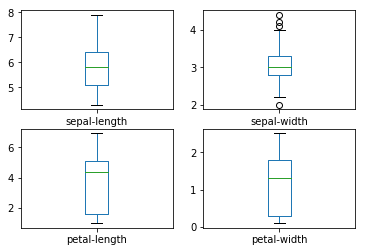

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [16]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
print(df.describe())

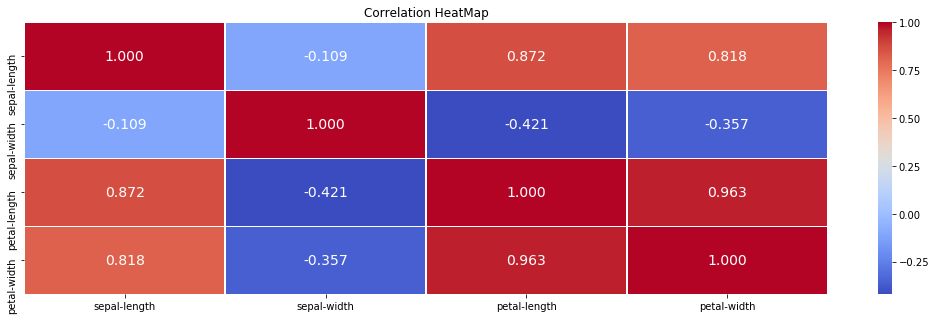

In [17]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5,  cmap='coolwarm', robust=True, fmt=".3f", annot_kws={'size':14})
plt.title("Correlation HeatMap")
plt.show()

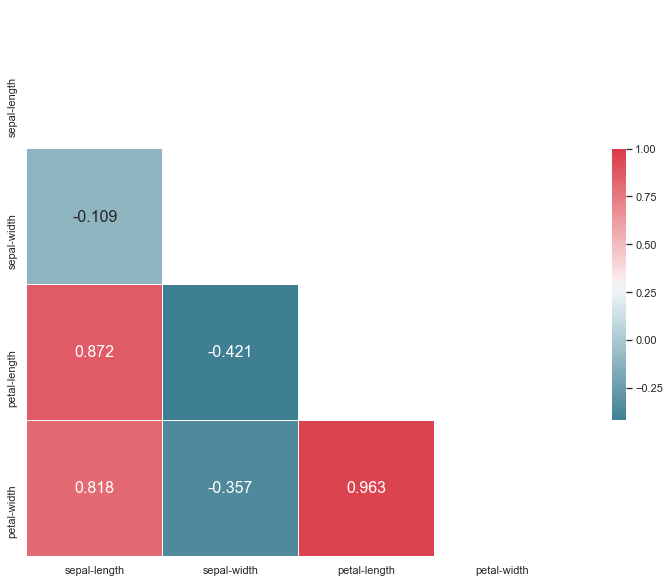

In [36]:
sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  annot=True, fmt=".3f", annot_kws={'size':16}, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<h3>Modeling using ML techniques</h3>

In [231]:
# 1) Training/Test Split
array = df.values

# INPUT 
X = array[:,0:4]
print("INPUT\n", X[:5,:5])

# OUTPUT - classifications
Y = array[:,4]
print("\nOUTPUT\n", Y[:5])


test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

INPUT
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]

OUTPUT
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [232]:
print("TRAINING SHAPE ")
print(X_train.shape)
print(Y_train.shape)

print("\nTEST SHAPE")
print(X_test.shape)
print(Y_test.shape)


TRAINING SHAPE 
(120, 4)
(120,)

TEST SHAPE
(30, 4)
(30,)


#### 10K FOLD CROSSVALIDATION TRAINING 

In [302]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
models = [
            ('LR', LogisticRegression()),
            ('LDA', LinearDiscriminantAnalysis()),
            ('KNN', KNeighborsClassifier()),
            ('CART', DecisionTreeClassifier()),
            ('NB', GaussianNB()),
            ('SVM', SVC())          
         ]

model_names = []
cv_metrics_result = []
cv_mean_result_collection =[]
cv_std_result_collection = []
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    cv_metrics_result.append(cv_results)
    model_names.append(name)
    cv_mean_result_collection.append(round(cv_results.mean(),3))
    cv_std_result_collection.append(round(cv_results.std(),3))                    
    #print(name)
    #msg = "μ: {}  σ:{}".format(round(cv_results.mean(),3), round(cv_results.std(),3))
    #print(msg)
    #print(np.round(cv_results,3), '\n')

In [303]:
error_list = [round(1- i,3) for i in cv_mean_result_collection ]
print(model_names)
print(cv_mean_result_collection)
print(error_list)

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']
[0.967, 0.975, 0.983, 0.967, 0.975, 0.992]
[0.033, 0.025, 0.017, 0.033, 0.025, 0.008]


In [304]:
df_cv_results = pd.DataFrame(cv_metrics_result)
a = df_cv_results.T 
a.columns = model_names
df = a.T
df['μ'] = cv_mean_result_collection
df['σ'] = cv_std_result_collection
df

,0,1,2,3,4,5,6,7,8,9,μ,σ
LR,1.000000,1.0,0.916667,1.000000,1.0,1.0,0.916667,0.916667,0.916667,1.000000,0.967,0.041
LDA,1.000000,1.0,1.000000,0.916667,1.0,1.0,0.916667,1.000000,0.916667,1.000000,0.975,0.038
KNN,1.000000,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.000000,1.000000,0.916667,0.983,0.033
CART,0.916667,1.0,1.000000,0.916667,1.0,1.0,0.916667,1.000000,0.916667,1.000000,0.967,0.041
NB,1.000000,1.0,1.000000,0.916667,1.0,1.0,1.000000,1.000000,0.833333,1.000000,0.975,0.053
SVM,1.000000,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.000000,1.000000,1.000000,0.992,0.025


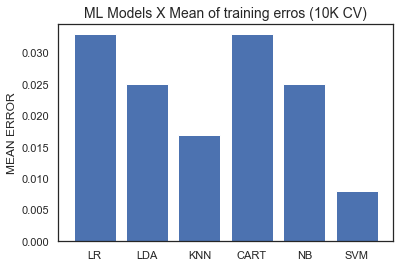

In [305]:
plt.bar(model_names, error_list)
plt.title('ML Models X Mean of training erros (10K CV)', size=14)
plt.ylabel('MEAN ERROR')
plt.show()

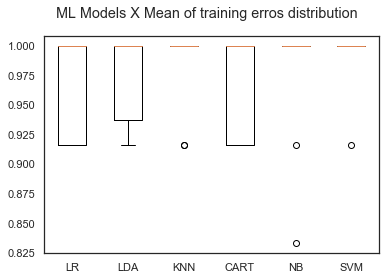

In [308]:
fig = plt.figure()
fig.suptitle('ML Models X Mean of training erros distribution')
ax = fig.add_subplot(111)
plt.boxplot(cv_metrics_result)
ax.set_xticklabels(model_names)
plt.savefig('plots/benchmark.png')

<h3>Test models with blind data</h3>

In [398]:
models = [
            ('LR', LogisticRegression()),
            ('LDA', LinearDiscriminantAnalysis()),
            ('KNN', KNeighborsClassifier()),
            ('CART', DecisionTreeClassifier()),
            ('NB', GaussianNB()),
            ('SVM', SVC())          
         ]
for name, model in models:
    print(name, model)

LR LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
LDA LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
KNN KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
CART DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
NB GaussianNB(priors=None, var_smoothing=1e-09)
SVM SVC(C=1.0, c

In [404]:
def fit_and_predict_with_model(model, X_train, Y_train, X_test):
    fitted_model = model.fit(X_train, Y_train)
    predictions = fitted_model.predict(X_test)
    return predictions
    

In [436]:
def create_model_confusion_matrix(model_name, blind_test, predictions):
    knn_confusion_matrix = confusion_matrix(predictions,blind_test)
    f, ax = plt.subplots(figsize=(15, 5))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(knn_confusion_matrix,annot=True, fmt=".3f", annot_kws={'size':16}, cmap=cmap, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.suptitle("{} Confusion Matrix".format(model_name), size=20)
    accuracy = accuracy_score(blind_test, predictions)
    plt.title("Accuracy score: {} ".format(accuracy), size=15)
    plt.show()

In [437]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

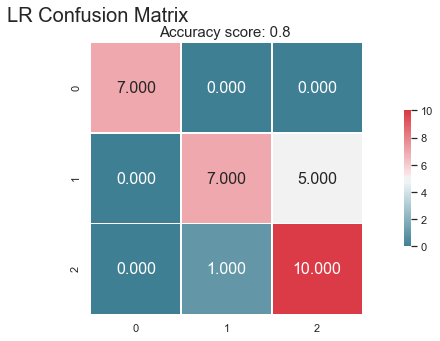

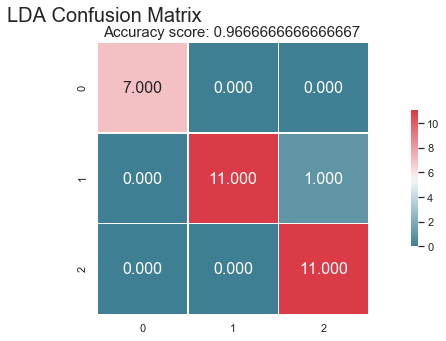

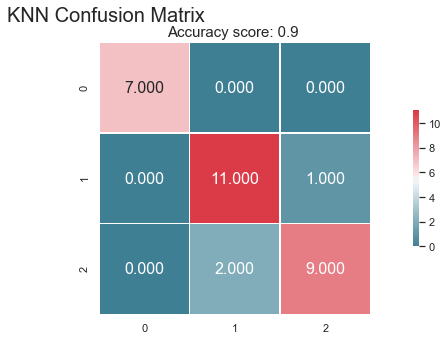

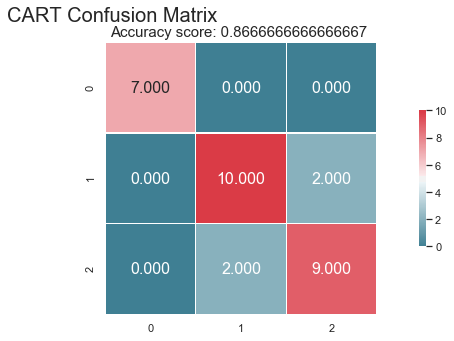

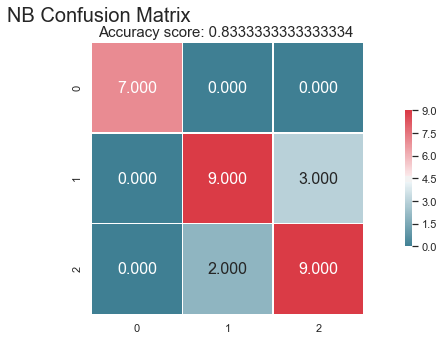

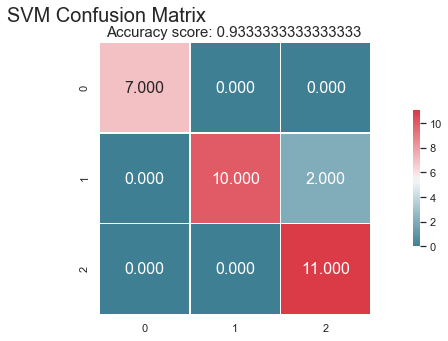

In [438]:
blind_test = Y_test
for model_name, model in models:
    create_model_confusion_matrix(model_name, fit_and_predict_with_model(model, X_train, Y_train, X_test ), blind_test)